## Question

Say you’re in a public library, and a beautiful stranger strikes up a conversation with you.

She says: "Let’s show pennies to each other, either heads or tails. If we both show heads, I pay you 3 dollars. If we both show tails, I pay you 1 dollar. If they don’t match, you pay me 2 dollars."

As the game is quiet, you can play in the library.

But should you? Should she?

## Solution

Let $p$ be the probability that you show heads and let $q$ be the probability that she shows heads. The expected pay out for you is,

$ P = 3pq + 1(1-p)(1-q) - 2p(1-q) - 2q(1-p) \\ \;\;\;= 8pq - 3(p+q) + 1$

If both of them simply tossed the coin, $p=q=1/2$ and the expected payout is 0.

Express the payout as $ P = p(8q-3) + (1-3q)$. If she plays such that $1/3 \lt q \lt 2/5$, then the expected payout is guaranteed to be negative regardless of your strategy, i.e., $p$. For $q=3/8$, $p$ becomes completely irrelevant and the expected payout is $ - 1/8$, i.e., you pay her 1 dollar for every 8 games you play.

Assuming she's smart enough to know this, you would be a fool to play this game with her!

In [89]:
import numpy as np

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm

Text(0.5, 1.0, 'Surface of the payout')

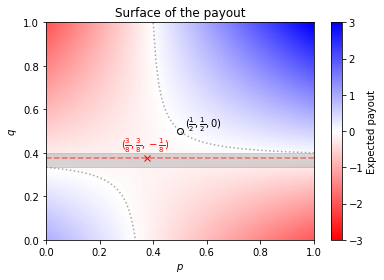

In [166]:
p = np.linspace(0,1,101)
X, Y = np.meshgrid(p,p)
P = 8*X*Y - 3*(X+Y) + 1

fig, ax = plt.subplots()
_im = ax.scatter(X.flatten(), Y.flatten(), c=P.flatten(), cmap=cm.bwr_r, vmin=-3, vmax=3 )
_cbar = fig.colorbar(_im, ax=ax)
_cbar.ax.set_ylabel('Expected payout')

## Plot the zeros
ax.plot(p[p<0.375], ((1.-3*p)/(3.-8*p))[p<0.375], color='gray', alpha=0.7, ls=':')
ax.plot(p[p>0.375], ((1.-3*p)/(3.-8*p))[p>0.375], color='gray', alpha=0.7, ls=':')
ax.plot(0.375,0.375, 'rx')
ax.plot(0.5,0.5,'ko',fillstyle='none')
ax.annotate(s=r'$(\frac{3}{8}, \frac{3}{8}, -\frac{1}{8})$', xy=(0.375,0.375), xytext=(0.28,0.42), color='r')
ax.annotate(s=r'$(\frac{1}{2}, \frac{1}{2}, 0)$', xy=(0.5, 0.5), xytext=(0.52,0.52), color='k')

## Plot the best strategy for her
ax.axhspan(ymin=1./3, ymax=2./5, color='gray', alpha=0.3 )
ax.axhline(3./8, color='r', ls='--',alpha=0.5)

ax.set_xlim([0,1])
ax.set_ylim([0,1])
ax.set_xlabel(r'$p$')
ax.set_ylabel(r'$q$')
ax.set_title('Surface of the payout')

## Monte Carlo simulation

In [34]:
def payoff(B1,B2):
    pay = -2 if B1!=B2 else 2*B1+1
    return pay

In [35]:
def play(N, p=3/8, q=3/8):
    B1 = np.random.uniform(size=N)<p
    B2 = np.random.uniform(size=N)<q
    
    payoffs = np.array([payoff(b1,b2) for b1,b2 in zip(B1,B2)])
    
    return payoffs

In [71]:
def plotit(payoffs, figax=None, label=None):
    N = len(payoffs)
    X = np.linspace(1,N,N)
    Y = np.cumsum(payoffs)/X
    
    if figax is None:
        fig, ax = plt.subplots()
    else:
        fig, ax = figax
        
    ax.plot(X,Y,'--',alpha=0.99, label=label)
    #ax.set_xscale('log')
    return fig,ax

(-0.3, 0.2)

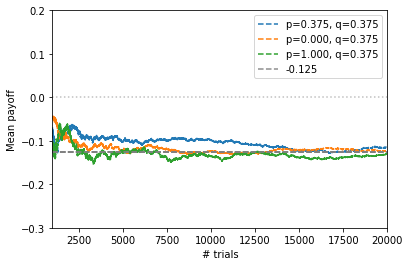

In [86]:
figax = None
N = 20000
for p,q in [(3/8, 3/8), (0,3/8), (1,3/8)]:
    payoffs = play(N,p=p,q=q)
    label = r'p=%.3f, q=%.3f' % (p,q)
    figax = plotit(payoffs, figax=figax, label=label)
fig,ax = figax
ax.axhline(-0.125, color='gray',ls='--',alpha=0.9,label='-0.125')
ax.axhline(0.0, color='gray',ls=':',alpha=0.5)
ax.legend(loc=1)
ax.set_xlabel('# trials')
ax.set_ylabel('Mean payoff')
ax.set_xlim([1000,N])
ax.set_ylim(-0.3,0.2)